## Table Of Contents:
* [Importing Data and helper functions](#importing-data)
* [Cleaning Data](#cleaning-data)
    - [NaN Check](#nan-check)
* [Queries](#queries)

# 1. Importing data and helper functions <a class="anchor" id="importing-data"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv("material_flow.csv")

In [2]:
# clearing rows from a dataset matching a given parameter
def remove_rows_from_dataset(rows, df):
    return df[~df["Country"].isin(rows)]

# used to print the measurement unit
def find_unit(value):
    conversion = {
        "kt" : 1_000,
        "Mt" : 1_000_000,
        "Gt" : 1_000_000_000
    }
    
    for unit, threshold in reversed(conversion.items()):
        if value >= threshold:
            return unit
    
    return "t"

# function to plot a sub-dataset based on a few parameters
def plot_flow_category(data, flow, category, years, ylabel = False, debug = False):
    years_filter = ["Country"] + [str(y) for y in years] 

    data_filters = (data["Flow name"] == flow) & (data["Category"] == category)

    # Filter for this chart only
    data = data[data_filters][years_filter]

    data = data.dropna()

    maximum_year = str(max(years))
    data = data[data[maximum_year] > 0]

    # Sort descending
    data = data.sort_values(maximum_year, ascending=False)

    data = data.head()

    if debug:
        print(data)
        return    

    melted_df = pd.melt(
        data,
        id_vars=["Country"],
        value_vars=years_filter,
        var_name="Year",
        value_name="Value"
    )

    plot = sb.barplot(
        data=melted_df,
        x="Country",
        y="Value",
        hue="Year",
        palette="viridis"
    )

    plt.xticks(data["Country"], rotation=45)
    plot.yaxis.offsetText.set_visible(False)

    plt.xlabel("Country")
    
    if ylabel:
        plt.ylabel(f"{ylabel}")
    else:
        max_value = max(
            value for col in data.columns for value in data[col] 
            if isinstance(value, (int, float))
        )
        
        plt.ylabel(f"{flow} ({find_unit(max_value)})")  # Use the flow unit from the data

    plt.title(f"{flow} by Country for Selected Years")
    plt.legend(title="Year")

    plt.show()

# 2. Cleaning data <a class="anchor" id="cleaning-data"></a>

In [3]:
# removing rows related to continets and organisations, need only countries
rows_to_remove = ["World", "Asia + Pacific", "North America", "EECCA", "West Asia", "Africa", "Europe", "Latin America + Caribbean"]
df = remove_rows_from_dataset(rows_to_remove, df)

All the columns present in the DataFrame

In [4]:
df.columns

Index(['Country', 'Category', 'Flow name', 'Flow code', 'Flow unit', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'],
      dtype='object')

## 2.1 NaN Check <a class="anchor" id="nan-check"></a>

In [5]:
is_nan_df = df.isna()

In [6]:
# If a value is NaN is has True in is_nan_df. We could check if there is any True value
any(is_nan_df["1970"])

True

In [7]:
nan_list = []
for c in is_nan_df.columns:
    if any(is_nan_df[c]):
        nan_list.append(c)

print(nan_list)
    

['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']


In [8]:
# Domestic Extraction	Fossil fuels (countries that extract petroleum)
# Products from fossil fuel/import (countries that buy gas n stuff)
# Products from biomass   export (countries that export other types of fuel like charcoal, methane, hydrogene

# 3. Queries <a class="anchor" id="queries"></a>

In [9]:
flows = df["Flow name"].drop_duplicates().values
flows

array(['Domestic Extraction', 'Domestic Material Consumption',
       'Domestic Material Input', 'Exports', 'Imports',
       'Material Footprint (RMC)', 'Physical Trade Balance',
       'Raw Material Equivalents of exports',
       'Raw Material Equivalents of imports'], dtype=object)

In [10]:
categories = df["Category"].drop_duplicates().values
categories

array(['Biomass', 'Excavated earthen materials (including soil) nec',
       'Fossil fuels', 'Metal ores', 'Mixed and complex products nec.',
       'Non-metallic minerals', 'Products from biomass',
       'Products from fossil fuels', 'Products from metals',
       'Products from non-metallic minerals',
       'Waste for final treatment and disposal'], dtype=object)

In [11]:
# global variable for storing the selected years
YEARS = [y for y in range(1970, 2025, 27)]

## 3.1 Domestic extraction of fossil fuels for selected years

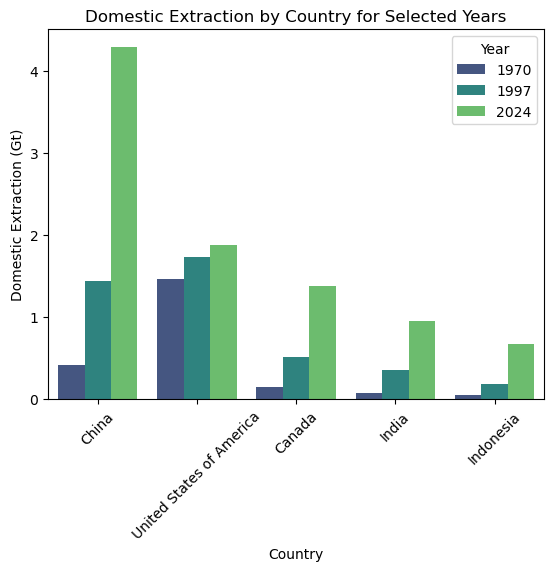

In [12]:
plot_flow_category(df, flow = "Domestic Extraction", category = "Fossil fuels", years = YEARS)

## 3.2 Exports of metal ores by Country for selected years

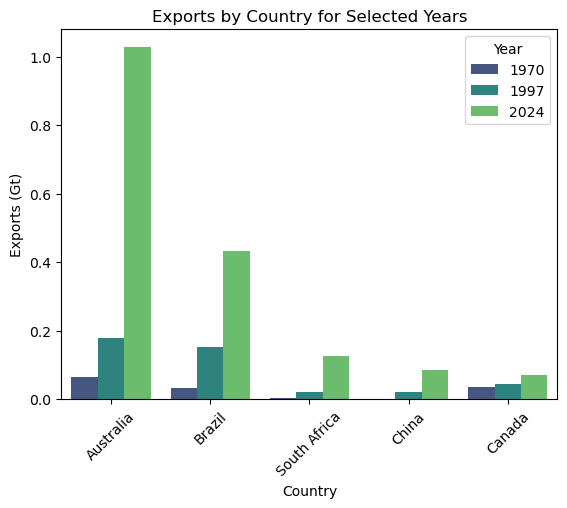

In [13]:
plot_flow_category(df, flow = "Exports", category = "Metal ores", years = YEARS)